# Churn Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1) Data Sourcing

In [5]:
# Data Loading

df_churn = pd.read_csv('TelcoCustomerChurn.csv')
df_churn_new = pd.read_csv('TelcoCustomerChurn_New.csv', sep=';')

In [6]:
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2) Exploratory Analysis

3.- Realizar un análisis exploratorio de los datos para entender un poco las variables con las cuáles queremos resolver el problema, haciendo visible los principales hallazgos en un tablero de control o visual de toma de decisiones (Visual Analytics), la cual pueda ayudar a darnos ciertos insights en la toma de decisiones. 

In [7]:
#  PANDAS:
# información general sobre los datos, como la cantidad de filas y columnas, los tipos de datos, las estadísticas descriptivas, etc

df_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df_churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        19 non-null     object 
 1   gender            19 non-null     object 
 2   SeniorCitizen     19 non-null     int64  
 3   Partner           19 non-null     object 
 4   Dependents        19 non-null     object 
 5   tenure            19 non-null     int64  
 6   PhoneService      19 non-null     object 
 7   MultipleLines     19 non-null     object 
 8   InternetService   19 non-null     object 
 9   OnlineSecurity    19 non-null     object 
 10  OnlineBackup      19 non-null     object 
 11  DeviceProtection  19 non-null     object 
 12  TechSupport       19 non-null     object 
 13  StreamingTV       19 non-null     object 
 14  StreamingMovies   19 non-null     object 
 15  Contract          19 non-null     object 
 16  PaperlessBilling  19 non-null     object 
 17 

In [10]:
df_churn_new.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [11]:
# verificar si los datos en las columnas customerID de los dataframes df_churn y df_new son los mismos

churn_customers = set(df_churn['customerID'])
new_customers = set(df_churn_new['customerID'])

common_customers = churn_customers.intersection(new_customers)

if len(common_customers) == 0:
    print("Los conjuntos de datos df_churn y df_new no tienen clientes en común.")
else:
    print("Hay clientes en común entre los conjuntos de datos df_churn y df_new.")


Los conjuntos de datos df_churn y df_new no tienen clientes en común.


In [12]:
# Información básica de df_churn
print("Información básica de df_churn:")
print(df_churn.shape)
print(df_churn.columns)
print(df_churn.head())


Información básica de df_churn:
(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service

In [13]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3) Data Wrangling

#### 3.1 Missing Value Handling

In [18]:
# Verificando si hay valores faltantes en los datos

print("Valores faltantes en df_churn:")
print(df_churn.isnull().sum())

Valores faltantes en df_churn:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [19]:
print(df_churn.isnull().sum().sum())

0


In [20]:
# Buscar espacios en blanco en columnas de tipo str
whitespace_rows = df_churn[df_churn.applymap(lambda x: isinstance(x, str) and x.isspace()).any(axis=1)]
whitespace_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
whitespace_rows.index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [22]:
# son 11 de 7043 filas, por lo que no es necesario eliminarlas
len(whitespace_rows)/len(df_churn) * 100
print("Porcentaje de filas con espacios en blanco: {:.2f}%".format(len(whitespace_rows)/len(df_churn) * 100))

Porcentaje de filas con espacios en blanco: 0.16%


In [23]:
# Parece que la columna "TotalCharges" está siendo identificada como categórica, pero en realidad es una columna numérica.

df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
#  imputar esos valores faltantes utilizando la media de los 'TotalCharges' 
# correspondientes a los casos en los que 'Contract' es igual a 'Two year'

mean_total_charges_two_year = df_churn.loc[df_churn['Contract'] == 'Two year', 'TotalCharges'].mean()
mean_total_charges_two_year

3728.9339465875396

In [25]:
df_churn.loc[df_churn['TotalCharges'].isnull(), 'TotalCharges'] = mean_total_charges_two_year


In [26]:
# select rows at whitespace_rows.index
df_churn.loc[whitespace_rows.index]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,3728.933947,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,3728.933947,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,3728.933947,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,3728.933947,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,3728.933947,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,3728.933947,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,3728.933947,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,3728.933947,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,3728.933947,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,3728.933947,No


In [27]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Análisis univariado

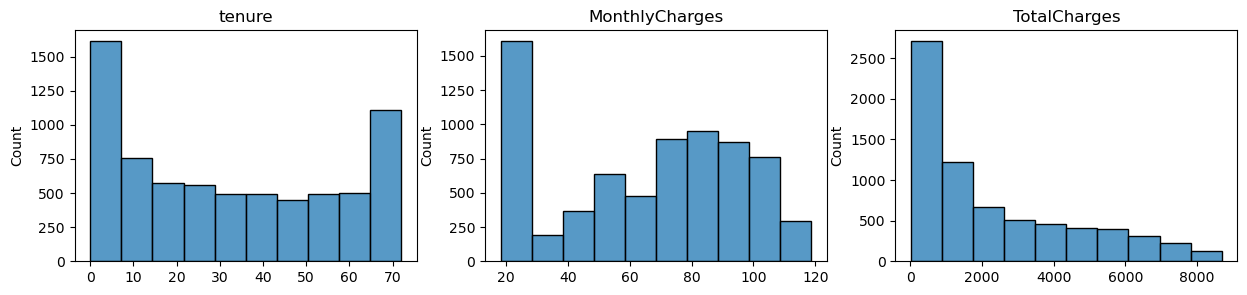

In [81]:
fig,axes=plt.subplots(1,3, figsize=(15, 3))
ax = sns.histplot(df_churn['tenure'].values, ax=axes[0], bins=10)
ax.set_title('tenure')
ax = sns.histplot(df_churn['MonthlyCharges'].values,ax=axes[1], bins=10)
ax.set_title('MonthlyCharges')
ax = sns.histplot(df_churn['TotalCharges'].values, ax=axes[2], bins=10)
ax.set_title('TotalCharges')
plt.show()

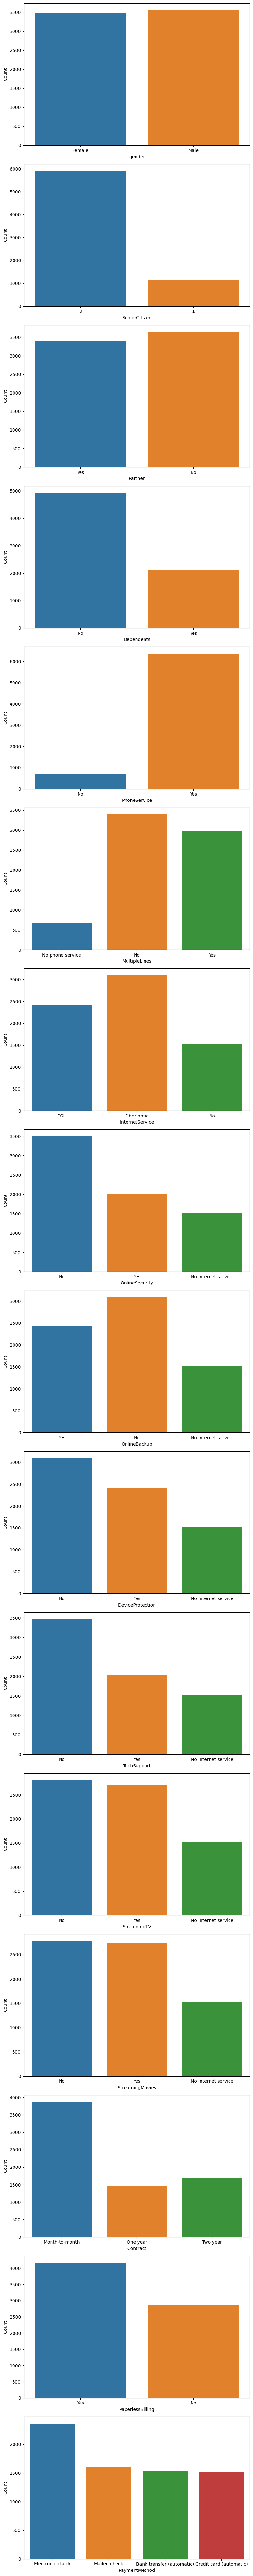

In [85]:
# Lista de variables categóricas
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Configuración del tamaño de la figura y los subplots
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, len(categorical_vars) * 5))

# Bucle for para crear los countplots
for i, var in enumerate(categorical_vars):
    # Crear countplot en el subplot correspondiente
    sns.countplot(x=var, data=df_churn, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [14]:
df_churn['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [78]:
df_churn['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [16]:
df_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [17]:
df_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

#### 3.1 Selecting Features and Target Label


In [28]:
y = df_churn['Churn']
features = df_churn.drop('Churn', axis=1)


In [29]:
# removiendo customerID

features = features.drop('customerID', axis=1)

In [30]:
features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


#### 3.2 Encoding Categorical Features

In [31]:
# Verificando si alguna de las columnas numericas son categoricas

features.select_dtypes(include=['int64', 'float64']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [32]:
# 'SeniorCitizen' es una variable categorica, no numerica
# cambiamos los datos de 0 y 1 a No y Yes respectivamente

features['SeniorCitizen'] = features['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
features['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [33]:
categorical_cols = features.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [34]:
# Encoding de las variables categóricas usando One-Hot Encoding
# es importante tener en cuenta la posibilidad de colinealidad entre las variables dummy
#  La colinealidad ocurre cuando una o más variables dummy pueden ser expresadas 
#  como una combinación lineal de las otras variables dummy.
# PERO  Esto te NO permitirá tener una representación completa de todas las categorías en las variables categóricas codificadas.

# df_cat_encoded = pd.get_dummies(features[categorical_cols], drop_first=True)

df_cat_encoded = pd.get_dummies(features[categorical_cols])
df_cat_encoded.head()


,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [35]:
df_cat_encoded.columns

Index(['gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'Pape

In [36]:
# combinando df_encoded con las variables numéricas restantes

numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [37]:
numeric_features = features[numeric_cols]

In [38]:
numeric_features.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [39]:
# Combina las variables numéricas con el DataFrame codificado
combined_features = pd.concat([numeric_features, df_cat_encoded], axis=1)
combined_features.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


#### 3.3 Confirmando Features and Label

In [40]:
y = df_churn['Churn'].replace({'No': 0, 'Yes': 1})
X = combined_features.copy()

In [41]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [42]:
class_distribution = y.value_counts()
print(class_distribution)

0    5174
1    1869
Name: Churn, dtype: int64


### 4) Modeling

In [43]:
# Imports para el modelo de clasificación, y metricas de evaluación

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [44]:
# total de 7043 filas de datos
len(X)

7043

In [45]:
# Para una evaluacion mas robusta del modelo, se recomienda usar validacion cruzada (cross-validation) para evaluar el rendimiento del modelo.
# y ademas separar conjunto de datos de prueba

#  Se realiza la separación de los datos originales en conjuntos de entrenamiento y prueba antes de aplicar la validación cruzada

#  80% para entrenamiento (X_train y y_train) y un 20% para prueba (X_test y y_test)
# Con un total de 7043 filas de datos, usar un 80% para entrenamiento (5634 filas) y un 20% para prueba (1409 filas) es una opción razonable.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Sin embargo, siempre es recomendable evaluar el rendimiento del modelo en diferentes divisiones de entrenamiento/prueba y considerar la posibilidad de realizar validación cruzada (cross-validation) para obtener estimaciones más robustas del rendimiento del modelo.

#### 4.1 Model 1: RandomForestClassifier (Baseline)

In [46]:
# Random Forest es un algoritmo popular y ampliamente utilizado en problemas de clasificación debido a su capacidad para manejar características tanto numéricas como categóricas, su capacidad para manejar datos desbalanceados y su robustez frente a sobreajuste.

# Además, Random Forest utiliza una combinación de múltiples árboles de decisión, lo que ayuda a mejorar la precisión y generalización del modelo. También proporciona información sobre la importancia de las características, lo que puede ser útil para el análisis de datos.

# En general, Random Forest es una opción sólida para problemas de clasificación, pero es importante evaluar y comparar diferentes modelos para encontrar el más adecuado.

In [47]:

# Definir el clasificador de Random Forest
clf_1 = RandomForestClassifier()

# Realizar validación cruzada con 5 folds 
# aplicar la técnica de validación cruzada utilizando solo el conjunto de entrenamiento (X_train, y_train).
scores_1 = cross_val_score(clf_1, X_train, y_train, cv=5)

# Imprimir los resultados de cada fold
print("Accuracy de cada fold:", scores_1)

# Imprimir la precisión media y la desviación estándar
print("Accuracy media:", scores_1.mean())
print("Desviación estándar:", scores_1.std())

Accuracy de cada fold: [0.80567879 0.78970719 0.76663709 0.78349601 0.77619893]
Accuracy media: 0.784343602295347
Desviación estándar: 0.01314939574644802


#### 4.2 Model 2: RandomForestClassifier (Manejando el desbalance de clases usando Over Sampling)

In [48]:
# El oversampling es una técnica utilizada para abordar el desequilibrio de clases en un conjunto de datos. Consiste en generar artificialmente muestras sintéticas de la clase minoritaria para igualar su cantidad a la clase mayoritaria. Esto ayuda a mejorar el rendimiento del modelo al proporcionarle más ejemplos de la clase subrepresentada

# sampling_strategy="not majority" en RandomOverSampler, significa que la estrategia de sobremuestreo se basará en las clases que no son la clase mayoritaria. En otras palabras, la clase minoritaria se replicará para igualar o superar el número de muestras de la clase mayoritaria.

# En este caso, si la clase mayoritaria es la clase "0" (no churn) y la clase minoritaria es la clase "1" (churn), utilizar sampling_strategy="not majority" hará que se generen nuevas muestras de la clase "1" hasta que alcance o supere el número de muestras de la clase "0". Esto ayudará a equilibrar las clases y abordar el desbalanceo de datos.

In [49]:

ros = RandomOverSampler(sampling_strategy="not majority") 
X_ovrsampled, y_ovrsampled = ros.fit_resample(X,y)

# Imprimir la distribución de clases después de aplicar RandomOverSampler
print("Distribución de clases después de aplicar RandomOverSampler:", Counter(y_ovrsampled))

Distribución de clases después de aplicar RandomOverSampler: Counter({0: 5174, 1: 5174})


In [50]:
X_train_ovrsampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_ovrsampled, y_ovrsampled, test_size=0.2, random_state=42)

In [51]:

rf_clf = RandomForestClassifier()

rf_clf_scores = cross_val_score(rf_clf, X_train_ovrsampled, y_train_oversampled, cv=5)

# Imprimir los resultados de cada fold
print("Accuracy de cada fold:", rf_clf_scores)

# Imprimir la precisión media y la desviación estándar
print("Accuracy media:", rf_clf_scores.mean())
print("Desviación estándar:", rf_clf_scores.std())

Accuracy de cada fold: [0.89130435 0.8544686  0.89009662 0.86586103 0.88519637]
Accuracy media: 0.8773853934060162
Desviación estándar: 0.014658202075615039


In [52]:
# Generar el informe de clasificación
y_pred_2 = cross_val_predict(rf_clf, X_train_ovrsampled, y_train_oversampled, cv=5)
report = classification_report(y_train_oversampled, y_pred_2)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4153
           1       0.84      0.94      0.89      4125

    accuracy                           0.88      8278
   macro avg       0.88      0.88      0.88      8278
weighted avg       0.88      0.88      0.88      8278



#### 4.3 Comparacion de Modelos (Random Forest, Gradient Boosting, XGBoost)

In [53]:

# Crear una lista para almacenar los modelos y las métricas
models = [RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier()]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
results = []

# Iterar sobre los modelos
for model, name in zip(models, model_names):

    scores = cross_val_score(model, X_train_ovrsampled, y_train_oversampled, cv=5)
    # Imprimir los resultados de cada fold
    print("\nModel: ", name)
    print("Accuracy de cada fold:", scores)
    print("Accuracy media:", scores.mean())
    print("Desviación estándar:", scores.std())

    y_pred_train = cross_val_predict(model, X_train_ovrsampled, y_train_oversampled, cv=5)

    # Calcular las métricas
    accuracy = accuracy_score(y_train_oversampled, y_pred_train)
    precision = precision_score(y_train_oversampled, y_pred_train)
    recall = recall_score(y_train_oversampled, y_pred_train)
    f1 = f1_score(y_train_oversampled, y_pred_train)

    # Guardar los resultados en el dataframe
    results.append([name, accuracy, precision, recall, f1])

# Crear el dataframe de resultados
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])



Model:  Random Forest
Accuracy de cada fold: [0.88949275 0.85688406 0.88949275 0.87250755 0.87854985]
Accuracy media: 0.877385393406016
Desviación estándar: 0.012154261659728875

Model:  Gradient Boosting
Accuracy de cada fold: [0.79468599 0.76509662 0.78683575 0.77220544 0.77401813]
Accuracy media: 0.7785683844885212
Desviación estándar: 0.0106846333109161

Model:  XGBoost
Accuracy de cada fold: [0.86594203 0.83816425 0.8423913  0.82900302 0.84773414]
Accuracy media: 0.8446469489323818
Desviación estándar: 0.012287041593627037


In [54]:
results_df.sort_values(by=['F1-score'], ascending=False, inplace=True)

In [55]:
#  el modelo Random Forest tiene el mayor valor de F1-score, lo que indica un buen equilibrio entre precisión y recall. 

#### 4.4 Model 3: XGBoost (Ajustando hiperparámetros)

In [56]:
# Los hiperparámetros del modelo XGBoost (Extreme Gradient Boosting) adecuados y comunes en la configuración de XGBoost:

# n_estimators: El número de árboles en el modelo. Un valor más alto puede mejorar el rendimiento del modelo, pero también aumenta el tiempo de entrenamiento. Es importante encontrar un equilibrio entre la complejidad del modelo y el tiempo de entrenamiento.

# learning_rate: La tasa de aprendizaje controla la contribución de cada árbol en el ensamblaje. Un valor más bajo implica una contribución más pequeña de cada árbol y puede requerir más árboles para alcanzar un buen rendimiento. Un valor más alto puede hacer que el modelo sea más rápido de entrenar, pero también puede llevar a un sobreajuste.

# max_depth: La profundidad máxima de cada árbol en el ensamblaje. Controla la complejidad del modelo y puede ayudar a evitar el sobreajuste. Un valor más alto permitirá modelos más complejos, pero también puede aumentar el riesgo de sobreajuste.

# min_child_weight: El peso mínimo necesario en una hoja del árbol para considerar una división adicional. Controla la regularización y puede ayudar a evitar divisiones demasiado específicas que se ajustan demasiado a los datos de entrenamiento.

# gamma: El umbral mínimo para hacer una división adicional en un árbol. Controla la regularización y puede ayudar a evitar divisiones que no aportan suficiente ganancia.

# colsample_bytree: La proporción de características (columnas) a considerar al construir cada árbol. Puede ayudar a controlar la varianza y evitar el sobreajuste al considerar solo una muestra de características en cada árbol.

In [57]:
# RandomizedSearchCV: Realiza una búsqueda aleatoria de hiperparámetros seleccionando un subconjunto aleatorio de combinaciones de hiperparámetros para evaluar. En lugar de evaluar todas las combinaciones posibles, selecciona un número específico de combinaciones de forma aleatoria. Esta búsqueda aleatoria permite una exploración más eficiente del espacio de búsqueda de hiperparámetros, lo que puede ser beneficioso cuando el espacio de búsqueda es grande y se dispone de recursos limitados. RandomizedSearchCV es especialmente útil cuando se tienen muchos hiperparámetros y valores posibles.

In [58]:
# Definir el clasificador de XGBoost Base

xgb_base = XGBClassifier()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200,stop=800,num=10)],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3,4,5,6,8,10,12,15], 
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7] 
}


# Realizar la búsqueda de hiperparámetros utilizando RandomizedSearchCV
xgb_grid_search = RandomizedSearchCV(xgb_base, param_grid, cv=5)
xgb_grid_search.fit(X_train_ovrsampled, y_train_oversampled)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", xgb_grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", xgb_grid_search.best_score_)

Mejores hiperparámetros: {'n_estimators': 666, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.3}
Mejor puntuación de validación cruzada: 0.8756944991753872


In [59]:
# Crear una instancia del clasificador con los hiperparámetros optimizados
xgb_tuned = XGBClassifier(
    n_estimators=600, 
    min_child_weight=1, 
    max_depth=15, 
    learning_rate=0.3, 
    gamma=0.2, 
    colsample_bytree=0.5)

# Realizar validación cruzada con 5 folds
xgb_tuned_scores = cross_val_score(xgb_tuned, X_train_ovrsampled, y_train_oversampled, cv=5)

# Imprimir los resultados de cada fold
print("Accuracy de cada fold:", xgb_tuned_scores)

# Imprimir la precisión media y la desviación estándar
print("Accuracy media:", xgb_tuned_scores.mean())
print("Desviación estándar:", xgb_tuned_scores.std())

Accuracy de cada fold: [0.88768116 0.86654589 0.88647343 0.87129909 0.8755287 ]
Accuracy media: 0.8775056555307442
Desviación estándar: 0.008324758210551116


In [60]:
# Generar el informe de clasificación
y_pred_xgb = cross_val_predict(xgb_tuned, X_train_ovrsampled, y_train_oversampled, cv=5)
report = classification_report(y_train_oversampled, y_pred_xgb)
print(report)



              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4153
           1       0.84      0.93      0.88      4125

    accuracy                           0.88      8278
   macro avg       0.88      0.88      0.88      8278
weighted avg       0.88      0.88      0.88      8278



### 5. Evaluation: Random Forest vs XGBoost (Ajustando hiperparámetros)

In [61]:
# CON DATOS DE ENTRENAMIENTO Y VALIDACIÓN

# Model:  Random Forest
# Accuracy de cada fold: [0.87439614 0.84842995 0.88224638 0.87190332 0.87311178]
# Accuracy media: 0.8700175139016595
# Desviación estándar: 0.011383066636821494

# Model:  XGBoost (tuned)
# Accuracy de cada fold: [0.87560386 0.85688406 0.86775362 0.87129909 0.88217523]
# Accuracy media: 0.8707431732270823
# Desviación estándar: 0.008433738181487209

# Los resultados muestran que tanto el modelo Random Forest como el modelo XGBoost (ajustado) tienen una precisión similar en promedio, con valores alrededor del 87%. Sin embargo, el modelo XGBoost ajustado tiene una desviación estándar ligeramente más baja, lo que indica una menor variabilidad entre los pliegues y sugiere un posible menor nivel de overfitting.

In [62]:
# Obtener predicciones en los DATOS DE PRUEBA

# Ajustar el modelo Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_ovrsampled, y_train_oversampled)
y_pred_rf = rf_clf.predict(X_test_oversampled)

# Ajustar el modelo XGBoost (ajustado)
xgb_tuned = XGBClassifier(
    n_estimators=600, 
    min_child_weight=1, 
    max_depth=15, 
    learning_rate=0.3, 
    gamma=0.2, 
    colsample_bytree=0.5)
xgb_tuned.fit(X_train_ovrsampled, y_train_oversampled)
y_pred_xgb = xgb_tuned.predict(X_test_oversampled)

# Evaluar el rendimiento en los datos de prueba
report_rf = classification_report(y_test_oversampled, y_pred_rf)
report_xgb = classification_report(y_test_oversampled, y_pred_xgb)

print("\nRandom Forest:")
print(report_rf)

print("\nXGBoost (tuned):")
print(report_xgb)


Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1021
           1       0.87      0.94      0.90      1049

    accuracy                           0.90      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070


XGBoost (tuned):
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1021
           1       0.86      0.94      0.90      1049

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070



In [63]:
# For the Random Forest model, the precision, recall, F1-score, and other metrics are provided for each class (0 and 1). The model achieved an accuracy of 90% on the test data.

# For the XGBoost (tuned) model, similar metrics are shown for each class. The model also achieved an accuracy of 89% on the test data.

# Based on these updated results, both models are performing well, with the Random Forest model achieving slightly higher accuracy. It's important to consider both accuracy and other metrics (precision, recall, F1-score) when evaluating the performance of a model. 

### 6. Deployment and Feature Importance

In [64]:
# Crear una instancia del modelo Random Forest 
rf_final_model = RandomForestClassifier()

# Entrenar el modelo con todos los datos disponibles
rf_final_model.fit(X_ovrsampled, y_ovrsampled)


RandomForestClassifier()

In [65]:
import joblib

# Guardando modelo final en archivo
joblib.dump(rf_final_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [67]:
df_churn_new = pd.read_csv('TelcoCustomerChurn_New.csv', sep=';')


# Realizar las mismas transformaciones en el nuevo conjunto de datos
# Eliminar la columna 'customerID' si es necesario
df_churn_new = df_churn_new.drop('customerID', axis=1)

# Convertir la columna 'SeniorCitizen' a tipo de datos 'object'
df_churn_new['SeniorCitizen'] = df_churn_new['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

# Convertir la columna 'TotalCharges' a tipo de datos numérico
df_churn_new['TotalCharges'] = pd.to_numeric(df_churn_new['TotalCharges'], errors='coerce')


# Realizar el one-hot encoding en el nuevo conjunto de datos
categorical_cols_new = df_churn_new.select_dtypes(include=['object']).columns
df_cat_encoded_new = pd.get_dummies(df_churn_new[categorical_cols_new])
numeric_cols_new = df_churn_new.select_dtypes(include=['int64', 'float64']).columns
combined_features_new = pd.concat([df_churn_new[numeric_cols_new], df_cat_encoded_new], axis=1)

In [68]:
df_churn_new.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [69]:
# Hacer las predicciones en el nuevo conjunto de datos
X_new = combined_features_new.copy()
y_pred = rf_final_model.predict(X_new)

# Mostrar las predicciones
print(y_pred)


[0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0]


In [ ]:
report_rf_final = classification_report(y_test_oversampled, y_pred)

#### 6.1 Feature Importances

In [70]:

# Calcular y visualizar las Feature Importances es importante porque nos permite identificar las características más relevantes o influyentes para el modelo en la predicción de la variable objetivo. Esto nos proporciona información valiosa sobre qué características tienen un mayor impacto en las decisiones del modelo y cómo contribuyen a la predicción de la variable objetivo.

# Al conocer las características más importantes, podemos obtener insights sobre los factores que influyen en la clasificación de los clientes en términos de churn. Esto puede ser útil para comprender qué aspectos del negocio están relacionados con la retención de clientes y qué características pueden ser consideradas como señales de alerta temprana de posible churn.

In [71]:
importances = rf_final_model.feature_importances_

In [72]:
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {importances[idx]}")


TotalCharges: 0.14545047439092723
tenure: 0.12995618978846066
MonthlyCharges: 0.12732583765632433
Contract_Month-to-month: 0.07013039438312224
Contract_Two year: 0.03824493667535113
TechSupport_No: 0.03486020492072117
OnlineSecurity_No: 0.02945561033088997
PaymentMethod_Electronic check: 0.028855163134911262
InternetService_Fiber optic: 0.024835176778985207
gender_Male: 0.01645602499187472
gender_Female: 0.016406024491314935
OnlineBackup_No: 0.016358820671533228
Contract_One year: 0.014333592179859448
PaperlessBilling_Yes: 0.014288758409628665
PaperlessBilling_No: 0.013673731170000654
Partner_Yes: 0.013344172962402954
DeviceProtection_No: 0.01304905853089292
Partner_No: 0.012735932944430808
MultipleLines_No: 0.012490419950228246
PaymentMethod_Credit card (automatic): 0.012325584576187555
Dependents_Yes: 0.012016802517105364
PaymentMethod_Bank transfer (automatic): 0.01182202824669712
Dependents_No: 0.011804715454846761
OnlineBackup_Yes: 0.011561496700270207
MultipleLines_Yes: 0.0115492

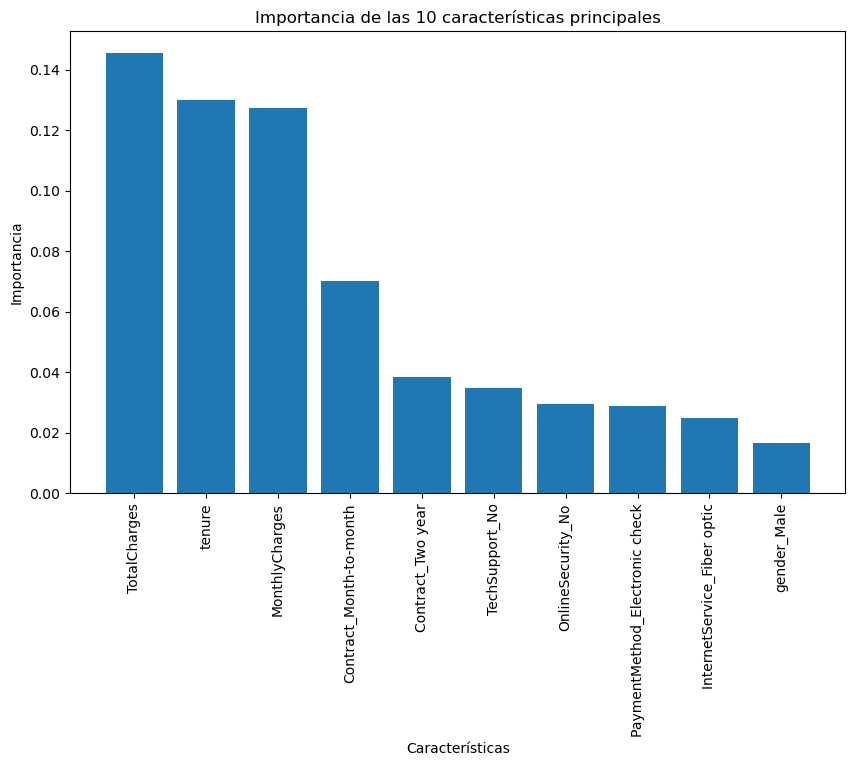

In [73]:
top_features_indices = sorted_indices[:10]
top_features = X_train.columns[top_features_indices]
top_importances = importances[top_features_indices]

plt.figure(figsize=(10, 6))
plt.bar(top_features, top_importances)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las 10 características principales')
plt.xticks(rotation=90)
plt.show()

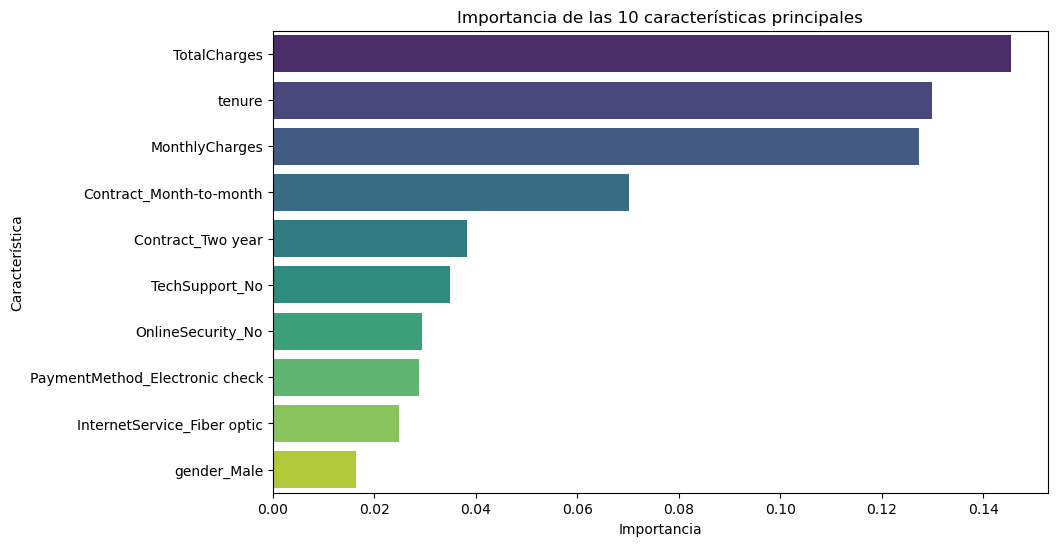

In [74]:
# Crear un dataframe con los nombres de las características y sus importancias
df_importance = pd.DataFrame({'Característica': top_features, 'Importancia': top_importances})

# Ordenar el dataframe por importancia descendente
df_importance = df_importance.sort_values('Importancia', ascending=False)

# Crear el histograma utilizando barplot de Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importance, x='Importancia', y='Característica', palette='viridis')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las 10 características principales')
plt.show()

In [75]:
# Los valores representan la importancia de cada característica en el modelo de Random Forest. Cuanto mayor sea el valor de importancia, más relevante es la característica en la predicción del resultado.

# Se muestra el nombre de cada característica seguido de su valor de importancia correspondiente. Por ejemplo, "TotalCharges: 0.15248798005665673" indica que la característica "TotalCharges" tiene una importancia de 0.15248798005665673 en el modelo.

# Al interpretar estos resultados, podemos decir que las características con las mayores importancias tienen un mayor impacto en la predicción del churn. En tu caso, parece que las características "TotalCharges", "tenure" y "MonthlyCharges" son las tres características más importantes, ya que tienen los valores de importancia más altos.

# Las características restantes también tienen una contribución significativa al modelo, pero en menor medida. Estas características incluyen elementos como el tipo de contrato, el soporte técnico, la seguridad en línea, el método de pago, el tipo de servicio de internet, el género, entre otros.

# En resumen, estos resultados indican qué características son más influyentes en el modelo para predecir el churn de los clientes. Se puede utilizar esta información para comprender mejor qué factores son importantes y tomar decisiones basadas en ellos para mejorar la retención de clientes.

In [76]:
# Basado en los resultados de la importancia de las características en el modelo de Random Forest, se observa que las tres columnas numéricas, "TotalCharges", "tenure" y "MonthlyCharges", tienen una alta importancia en la predicción del churn. Esto puede indicar que estas variables numéricas están fuertemente relacionadas con el comportamiento de los clientes y su propensión a darse de baja. Por ejemplo, es posible que los clientes con un valor total de cargos más alto, una mayor antigüedad en la empresa o cargos mensuales más altos sean más propensos a cancelar sus servicios.

# En cuanto a las características categóricas, es interesante observar que los contratos de tipo "Month-to-month" y "Two year" tienen una alta importancia en la predicción del churn. Esto sugiere que los clientes con contratos de duración mensual (sin compromiso a largo plazo) y aquellos con contratos de dos años tienen diferentes tasas de churn y que estos contratos son buenos indicadores para predecir si un cliente se dará de baja.

# Las características relacionadas con el soporte técnico y la seguridad en línea, como "TechSupport_No" y "OnlineSecurity_No", también son relevantes en la predicción del churn. Esto puede sugerir que la disponibilidad o falta de soporte técnico y seguridad en línea influyen en la decisión de los clientes de abandonar la empresa.

# En general, el análisis de churn en la industria de las telecomunicaciones es un tema importante y desafiante. La alta competencia en el mercado, los cambios en las preferencias de los clientes y otros factores pueden influir en la tasa de churn. Es crucial comprender los factores clave que influyen en la decisión de un cliente de darse de baja y utilizar estos conocimientos para implementar estrategias efectivas de retención de clientes.

# En este caso específico, el modelo de Random Forest ha identificado las características más importantes para predecir el churn, lo que puede ayudar a la empresa a centrar sus esfuerzos en áreas específicas para retener a sus clientes. Sin embargo, es importante tener en cuenta que el análisis de churn es un proceso continuo y evolutivo, y es necesario monitorear y adaptar constantemente las estrategias de retención en función de los cambios en el comportamiento de los clientes y el mercado en general.

#### 6.2 ¿Cuánto es la cantidad de clientes a gestionar para por lo menos detectar el 40% de los fugados? 

In [86]:

# Obtén las probabilidades de predicción de churn
churn_probs = rf_final_model.predict_proba(X_ovrsampled)[:, 1]  # Reemplaza 'model' con tu modelo entrenado y 'X' con tus datos de entrada

# Crea un DataFrame con las probabilidades de predicción y la variable objetivo
df_churn_probs = pd.DataFrame({'Churn Probability': churn_probs, 'Churn': y_ovrsampled})

# Ordena los clientes en orden descendente según sus probabilidades de predicción de churn
df_churn_sorted = df_churn_probs.sort_values('Churn Probability', ascending=False)

# Calcula la cantidad acumulada de clientes necesarios para alcanzar o superar el 40% de los clientes fugados
total_churned = df_churn_sorted['Churn'].sum()
target_churn = total_churned * 0.4

cumulative_churned = 0
clients_needed = 0
for churn in df_churn_sorted['Churn']:
    cumulative_churned += churn
    clients_needed += 1
    if cumulative_churned >= target_churn:
        break

# Imprime la cantidad de clientes necesarios
print("Cantidad de clientes necesarios para detectar al menos el 40% de los fugados:", clients_needed)


Cantidad de clientes necesarios para detectar al menos el 40% de los fugados: 2070
